# SQL Questions - Classification

Questions 1.-4. are about uploading the data into the MySQL workbench. \
I used jupyter notebook, so the outputs of the queries are at a glance in this notebook. 

In [ ]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password = getpass.getpass()
connection_string = 'mysql+pymysql://root:' + password + '@localhost/credit'
engine = create_engine(connection_string)

### **5.1. Use the alter table command to drop the column q4_balance from the database.** 

In [ ]:
ALTER TABLE credit_card_data
DROP COLUMN q4_balance;

### **5.2. Select all the data from the table to verify if the command worked.**

In [7]:
data = pd.read_sql_query('SELECT * FROM credit_card_data', engine)
data.head(10)

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0


### **6. Use sql query to find how many rows of data you have.**

In [8]:
query_6 = '''
        SELECT COUNT(*) AS count_rows FROM credit_card_data;
        '''
data = pd.read_sql_query(query_6, engine)
data.head()

,count_rows
0,17976


### **7. Count unique values**
What are the unique values in the column `Offer_accepted`?

In [9]:
query_7_1 = '''
        SELECT DISTINCT(offer_accepted) FROM credit_card_data;
        '''
data = pd.read_sql_query(query_7_1, engine)
data.head()

,offer_accepted
0,No
1,Yes


What are the unique values in the column `Reward`?

In [14]:
query_7_2 = '''
        SELECT DISTINCT(reward) FROM credit_card_data;
        '''
data = pd.read_sql_query(query_7_2, engine)
data.head()

,reward
0,Air Miles
1,Cash Back
2,Points


What are the unique values in the column `mailer_type`?

In [11]:
query_7_3 = '''
        SELECT DISTINCT(mailer_type) FROM credit_card_data;
        '''
data = pd.read_sql_query(query_7_3, engine)
data.head()

,mailer_type
0,Letter
1,Postcard


What are the unique values in the column `credit_cards_held`?

In [12]:
query_7_4 = '''
        SELECT DISTINCT(credit_cards_held) FROM credit_card_data;
        '''
data = pd.read_sql_query(query_7_4, engine)
data.head()

,credit_cards_held
0,2
1,1
2,3
3,4


What are the unique values in the column `household_size`?

In [15]:
query_7_5 = '''
        SELECT DISTINCT(household_size) FROM credit_card_data;
        '''
data = pd.read_sql_query(query_7_5, engine)
data.head()

,household_size
0,4
1,5
2,2
3,6
4,3


### **8. Arrange the data in a decreasing order by the average_balance of the house.** 
Return only the customer_number of the top 10 customers with the highest average_balances in your data.

In [17]:
query_8 = '''
        SELECT customer_number AS customer_highest_avg_balance FROM credit_card_data 
        ORDER BY average_balance DESC
        LIMIT 10; 
        '''
data = pd.read_sql_query(query_8, engine)
data.head()

,customer_highest_avg_balance
0,2297
1,12636
2,8888
3,10577
4,14004


### **9. What is the average balance of all the customers in your data?**

In [20]:
query_9 = '''
        SELECT ROUND(AVG(average_balance), 2) AS average_balance_all_customers FROM credit_card_data;
        '''
data = pd.read_sql_query(query_9, engine)
data.head()

,average_balance_all_customers
0,940.52


### **10. What is the average balance of the customers grouped by `Income Level`?**

In this exercise we will use group by to check the properties of some of the categorical variables in our data
Note wherever average_balance is asked in the questions below, please take the average of the column average_balance. 
The returned result should have only two columns, income level and `Average balance` of the customers.
Use an alias to change the name of the second column.

In [21]:
query_10_1 = '''
        SELECT income_level, ROUND(AVG(average_balance), 2) AS avg_balance  FROM credit_card_data
        GROUP BY income_level;
        '''
data = pd.read_sql_query(query_10_1, engine)
data.head()

,income_level,avg_balance
0,High,942.57
1,Medium,940.89
2,Low,937.66


What is the average balance of the customers grouped by `number_of_bank_accounts_open`?
The returned result should have only two columns, `number_of_bank_accounts_open` and `Average balance` of the customers. 
Use an alias to change the name of the second column.

In [ ]:
query_10_2 = '''
         SELECT bank_accounts_open, ROUND(AVG(average_balance), 2) AS avg_balance  FROM credit_card_data
         GROUP BY bank_accounts_open;
        '''
data = pd.read_sql_query(query_10_2, engine)
data.head()

What is the average number of credit cards held by customers for each of the credit card ratings? 
The returned result should have only two columns, rating and average number of credit cards held. 
Use an alias to change the name of the second column.

In [22]:
query_10_3 = '''
         SELECT bank_accounts_open, ROUND(AVG(average_balance), 2) AS avg_balance  FROM credit_card_data
         GROUP BY bank_accounts_open;
        '''
data = pd.read_sql_query(query_10_3, engine)
data.head()

,bank_accounts_open,avg_balance
0,1,941.53
1,2,936.47
2,3,948.28


### **Correlation credit_cards_held and number_of_bank_accounts_open** 
Is there any correlation between the columns `credit_cards_held` and `number_of_bank_accounts_open`? You can analyse this by grouping the data by one of the variables and then aggregating the results of the other column. Visually check if there is a positive correlation or negative correlation or no correlation between the variables.
You might also have to check the number of customers in each category (ie number of credit cards held) to assess if that category is well represented in the dataset to include it in your analysis. For eg. If the category is under-represented as compared to other categories, ignore that category in this analysis

In [25]:
query_10_4 = '''
         SELECT COUNT(credit_cards_held), bank_accounts_open FROM credit_card_data
         GROUP BY bank_accounts_open;
        '''
data = pd.read_sql_query(query_10_4, engine)
data.head()

,COUNT(credit_cards_held),bank_accounts_open
0,13674,1
1,4007,2
2,295,3


In [30]:
query_10_5 = '''
         SELECT credit_cards_held, COUNT(bank_accounts_open) FROM credit_card_data
         GROUP BY credit_cards_held;
        '''
data = pd.read_sql_query(query_10_5, engine)
data.head()

,credit_cards_held,COUNT(bank_accounts_open)
0,2,7933
1,1,6147
2,3,3381
3,4,515


Result: About 75% (13.674) of the customers have one bank account open. About 78% of the customers have one or two credit cards. 
The minority have two, three bank accounts open or more than two credit cards.

Only 295 customers have 3 bank accounts open. Only 515 customers have 4 credit cards. So I decided to ignore these customers for doing the currelation map. 

In [35]:
data['credit_cards_held'] = data['credit_cards_held'].apply(lambda x: x if x < 4 else 3)

data['credit_cards_held'].value_counts()

2    7933
1    6147
3    3896
Name: credit_cards_held, dtype: int64

In [37]:
data['bank_accounts_open'] = data['bank_accounts_open'].apply(lambda x: x if x < 3 else 2)

data['bank_accounts_open'].value_counts()

1    13674
2     4302
Name: bank_accounts_open, dtype: int64

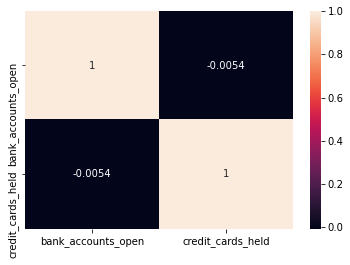

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
num_columns = data[['bank_accounts_open', 'credit_cards_held']]
sns.heatmap(num_columns.corr(), annot=True)
plt.show()

The heatmap shows that there is no correlation (0.0054) between the two columns bank_accounts_open and credit_cards_held. 

### **11. Your managers are only interested in the customers with the following properties:**
- Credit rating medium or high
- Credit cards held 2 or less
- Owns their own home
- Household size 3 or more

For the rest of the things, they are not too concerned. Write a simple query to find what are the options available for them? Can you filter the customers who accepted the offers here?

In [44]:
query_11_1 = '''
SELECT customer_number, offer_accepted, credit_rating, credit_cards_held, own_your_home, household_size
FROM credit_card_data
WHERE (credit_rating = 'High' OR credit_rating = 'Medium')
AND (credit_cards_held <= 2)
AND (own_your_home = 'Yes')
AND (household_size >= 3);
        '''
data = pd.read_sql_query(query_11_1, engine)
data

,customer_number,offer_accepted,credit_rating,credit_cards_held,own_your_home,household_size
0,2,No,Medium,2,Yes,5
1,5,No,Medium,2,Yes,6
2,17,No,Medium,1,Yes,4
3,18,No,High,2,Yes,4
4,20,No,High,2,Yes,5
...,...,...,...,...,...,...
4944,17984,No,High,1,Yes,4
4945,17986,No,Medium,1,Yes,5
4946,17987,No,High,2,Yes,3
4947,17988,No,Medium,1,Yes,5


Around a quarter of customers meet these requirements. This suggests that there is a lot of potential in this customer group.

In [45]:
query_11_2 = '''
SELECT customer_number, offer_accepted, credit_rating, credit_cards_held, own_your_home, household_size
FROM credit_card_data
WHERE (offer_accepted = 'yes')
AND (credit_rating = 'High' OR credit_rating = 'Medium')
AND (credit_cards_held <= 2)
AND (own_your_home = 'Yes')
AND (household_size >= 3);
        '''
data = pd.read_sql_query(query_11_2, engine)
data

,customer_number,offer_accepted,credit_rating,credit_cards_held,own_your_home,household_size
0,113,Yes,High,2,Yes,5
1,132,Yes,Medium,2,Yes,3
2,251,Yes,Medium,1,Yes,5
3,478,Yes,High,2,Yes,3
4,606,Yes,Medium,1,Yes,4
...,...,...,...,...,...,...
162,17842,Yes,High,2,Yes,3
163,17904,Yes,Medium,1,Yes,4
164,17932,Yes,High,2,Yes,5
165,17943,Yes,Medium,1,Yes,3


There are only 167 customers with the following properties who accepted the offer. So I would give the hint, that this customers are under 1% of all customers and that is worth addressing this customer group.

#### 12. Your managers want to find out the list of customers whose average balance is less than the average balance of all the customers in the database. 
Write a query to show them the list of such customers. You might need to use a subquery for this problem.

In [49]:
data = pd.read_sql_query('SELECT * FROM credit_card_data', engine)
data["average_balance"].mean()

940.5155624165554

In [47]:
query_12 = '''
SELECT customer_number, average_balance
FROM credit_card_data 
HAVING average_balance < (SELECT AVG(average_balance) FROM credit_card_data)
        '''
data = pd.read_sql_query(query_12, engine)
data

,customer_number,average_balance
0,2,147.25
1,3,276.50
2,7,283.75
3,8,278.50
4,22,811.75
...,...,...
6996,17989,911.00
6997,17991,335.75
6998,17994,925.50
6999,17996,167.50


### 13. Since this is something that the senior management is regularly interested in, create a view called Customers__Balance_View1 of the same query.

In [ ]:
query_13 = '''
CREATE VIEW Customers__Balance_View1 AS
SELECT customer_number, average_balance
FROM credit_card_data 
HAVING average_balance < (SELECT AVG(average_balance) FROM credit_card_data)
        '''
data = pd.read_sql_query(query_13, engine)
data

### 14. What is the number of people who accepted the offer vs number of people who did not?

In [56]:
query_14 = '''
         SELECT COUNT(customer_number) AS customers, offer_accepted FROM credit_card_data
         GROUP BY offer_accepted;
        '''
data = pd.read_sql_query(query_14, engine)
data.head()

,customers,offer_accepted
0,16955,No
1,1021,Yes


### 15. Your managers are more interested in customers with a credit rating of high or medium. What is the difference in average balances of the customers with high credit card rating and low credit card rating?

In [59]:
query_15_1 = '''
          SELECT credit_rating, average_balance FROM credit_card_data
          WHERE (credit_rating = 'High' OR credit_rating = 'Medium')
          GROUP BY credit_rating;
        '''
data = pd.read_sql_query(query_15_1, engine)
data.head()

,credit_rating,average_balance
0,High,1160.75
1,Medium,147.25


In [60]:
query_15_2 = '''
          SELECT credit_rating, average_balance FROM credit_card_data
          WHERE credit_rating = 'LOW'
          GROUP BY credit_rating;
        '''
data = pd.read_sql_query(query_15_2, engine)
data.head()

,credit_rating,average_balance
0,Low,1005.0


### 16. In the database, which all types of communication (mailer_type) were used and with how many customers?

In [61]:
query_16 = '''
         SELECT COUNT(customer_number) AS customers, mailer_type FROM credit_card_data
         GROUP BY mailer_type;
        '''
data = pd.read_sql_query(query_16, engine)
data.head()

,customers,mailer_type
0,8842,Letter
1,9134,Postcard


### 17. Provide the details of the customer that is the 11th least Q1_balance in your database.

In [ ]:
query_17 = '''
        SELECT * FROM credit_card_data 
        WHERE customer_number = (SELECT (MAX(customer_number)-11) FROM credit_card_data);
        '''
data = pd.read_sql_query(query_17, engine)
data.head()